# Laboratory Three - Classification I

In [1]:
import pandas as pd

firstdata = pd.read_csv('/Users/adunifekizitookoye/Desktop/Final Year courses/CSCI 4150U - Data Mining/datasets0/german.data',
                   header=None)
firstdata.columns = ['first']
split_data = firstdata['first'].str.split(" ")
data = split_data.to_list()
names = ['Status of existing checking account','Duration in month','Credit history',
         'Purpose','Credit amount','Savings account/bonds','Present employment since',
         'Installment rate in percentage of disposable income','Personal status and sex','Other debtors / guarantors',
         'Present residence since','Property','Age in years','Other installment plans','Housing',
         'Number of existing credits at this bank','Job',
         'Number of people being liable to provide maintenance for','Telephone','foreign worker', 'Class']
new_df = pd.DataFrame(data, columns=names)
new_df.head(2)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2


In [2]:
# new_df.dtypes

In [3]:
# new_df['Duration in month'].astype(str).astype(int)

In [4]:
'''
X1 = new_df['Duration in month'].astype(str).astype(int)
X2 = new_df['Credit amount'].astype(str).astype(int)
X3 = [X1, X2]
X = pd.DataFrame(X3)
print(X)
print(X.T) 
'''

"\nX1 = new_df['Duration in month'].astype(str).astype(int)\nX2 = new_df['Credit amount'].astype(str).astype(int)\nX3 = [X1, X2]\nX = pd.DataFrame(X3)\nprint(X)\nprint(X.T) \n"

In [5]:
from sklearn import tree
Y = new_df['Class'].astype(str).astype(int)
X1 = new_df['Duration in month'].astype(str).astype(int)
X2 = new_df['Credit amount'].astype(str).astype(int)
X3 = [X1,X2]
X = pd.DataFrame(X3)
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X.T, Y)

In [10]:
!pip uninstall graphviz

In [9]:
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_data = tree.export_graphviz(clf, feature_names=X.T.columns, class_names=['Good','Bad'], filled=True,
                               out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

### Part I:

#### 1. Build a decision tree model and evaluate the model using:
    1. Holdout
        A. Use 90% of data set for train and 10 % for the test, and perform it 5 times, the final results are the average of performance trials
        B. You should report the Accuracy, Precision and F-measure for each trial as well as their final average (use a table and then a bar chart)

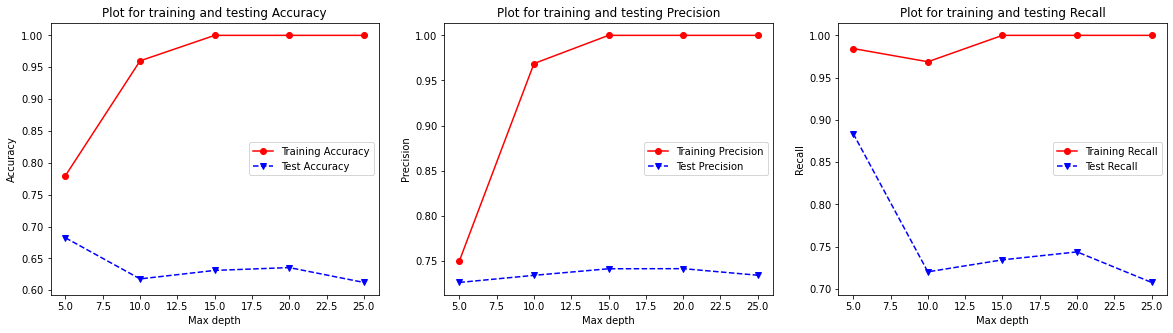

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
#############################################
# Training and Test set creation
#############################################

from sklearn.model_selection import train_test_split

#test_size = 0.1 since using 10% of daata for the test
X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y, test_size=0.9, random_state=1)
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

#############################################
# Model fitting and evaluation
#############################################

maxdepths = [5,10,15,20,25]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

trainPre = np.zeros(len(maxdepths))
testPre = np.zeros(len(maxdepths))

trainScore = np.zeros(len(maxdepths))
testScore = np.zeros(len(maxdepths))


index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    trainPre[index] = precision_score(Y_train, Y_predTrain)
    testPre[index] = precision_score(Y_test, Y_predTest)
    trainScore[index] = recall_score(Y_train, Y_predTrain)
    testScore[index] = recall_score(Y_test, Y_predTest)
    index += 1

#############################################
# Plot of training and test accuracies
#############################################
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.title('Plot for training and testing Accuracy')
plt.plot(maxdepths, trainAcc, 'ro-', maxdepths, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

#############################################
# Plot of training and test precisions
#############################################
plt.subplot(132)
plt.title('Plot for training and testing Precision')
plt.plot(maxdepths, trainPre, 'ro-', maxdepths, testPre, 'bv--')
plt.legend(['Training Precision', 'Test Precision'])
plt.xlabel('Max depth')
plt.ylabel('Precision')

#############################################
# Plot of training and test recalls
#############################################
plt.subplot(133)
plt.title('Plot for training and testing Recall')
plt.plot(maxdepths, trainScore, 'ro-', maxdepths, testScore, 'bv--')
plt.legend(['Training Recall', 'Test Recall'])
plt.xlabel('Max depth')
plt.ylabel('Recall')
plt.show()

    2. Cross-validation 
       A. Perform 10-fold cross-validation for evaluating the model 
       B. You should report the Accuracy, Precision and F-measure for each trial as well as their final average ((use a table and then a bar chart))

In [13]:
import pandas as pd
data2 = pd.read_csv('/Users/adunifekizitookoye/Desktop/Final Year courses/CSCI 4150U - Data Mining/datasets0/waveform.data', header=None)
data2.columns = ['col1', 'col2', 'col3','col4','col5','col6','col7','col8','col9','col10','col11','col12','col13','col14',
                'col15','col16','col17','col18','col19','col20','col21','Class']
data2.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col13,col14,col15,col16,col17,col18,col19,col20,col21,Class
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


In [14]:
data2.dtypes

col1     float64
col2     float64
col3     float64
col4     float64
col5     float64
col6     float64
col7     float64
col8     float64
col9     float64
col10    float64
col11    float64
col12    float64
col13    float64
col14    float64
col15    float64
col16    float64
col17    float64
col18    float64
col19    float64
col20    float64
col21    float64
Class      int64
dtype: object

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    5000 non-null   float64
 1   col2    5000 non-null   float64
 2   col3    5000 non-null   float64
 3   col4    5000 non-null   float64
 4   col5    5000 non-null   float64
 5   col6    5000 non-null   float64
 6   col7    5000 non-null   float64
 7   col8    5000 non-null   float64
 8   col9    5000 non-null   float64
 9   col10   5000 non-null   float64
 10  col11   5000 non-null   float64
 11  col12   5000 non-null   float64
 12  col13   5000 non-null   float64
 13  col14   5000 non-null   float64
 14  col15   5000 non-null   float64
 15  col16   5000 non-null   float64
 16  col17   5000 non-null   float64
 17  col18   5000 non-null   float64
 18  col19   5000 non-null   float64
 19  col20   5000 non-null   float64
 20  col21   5000 non-null   float64
 21  Class   5000 non-null   int64  
dtype

In [30]:
Y2 = data2['Class']
X2 = data2.drop(['Class'], axis=1)

In [31]:
Y2.shape

(5000,)

In [32]:
X2.shape

(5000, 21)

In [34]:
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_data = tree.export_graphviz(clf, feature_names=X.T.columns, class_names=['class 0', 'class 1', 'class 2'], filled=True,
                               out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [27]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
'''
Accuracy = (TP + TN) /(TP + TN + FP + FN)
Precision = (TP) / (TP + FP)
Recall = (TP) / (TP + FN)
'''

from sklearn import tree
from sklearn.model_selection import train_test_split



scoresTrain2 = []
scoresTest2 = []

indexes = [0,1,2,3,4,5,6,7,8,9,10]

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.9)
clf2 = tree.DecisionTreeClassifier(max_depth=2)
scoresTest2.append(cross_val_score(clf2, X_test2, Y_test2, cv=10))
scoresTrain2.append(cross_val_score(clf2, X_train2, Y_train2, cv=10))
 
#############################################
# Plot of training and test accuracies
#############################################
print("Cross val score for training set = ", scoresTrain2)
print("Cross val score for testing set = ", scoresTest2)

Cross val score for training set =  [array([0.62, 0.62, 0.56, 0.64, 0.74, 0.68, 0.62, 0.72, 0.7 , 0.64])]
Cross val score for testing set =  [array([0.68888889, 0.67333333, 0.71111111, 0.70666667, 0.66222222,
       0.7       , 0.66      , 0.70888889, 0.70666667, 0.69111111])]


### Part II:

#### 1. Select the Entropy as the impurity measure and repeat Part I 

In [ ]:
from sklearn import tree
Y = new_df['Class'].astype(str).astype(int)
X1 = new_df['Duration in month'].astype(str).astype(int)
X2 = new_df['Credit amount'].astype(str).astype(int)
X3 = [X1,X2]
X = pd.DataFrame(X3)
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X.T, Y)

In [ ]:
testdata = pd.read_csv('/Users/adunifekizitookoye/Desktop/CSCI 4150U - Data Mining/waveform.data', header=None)
testdata.columns = ['?','Status of existing checking account','Duration in month','Credit history',
         'Purpose','Credit amount','Savings account/bonds','Present employment since',
         'Installment rate in percentage of disposable income','Personal status and sex','Other debtors / guarantors',
         'Present residence since','Property','Age in years','Other installment plans','Housing',
         'Number of existing credits at this bank','Job',
         'Number of people being liable to provide maintenance for','Telephone','foreign worker', 'Class']
testdata.head()

testY = testdata['Class']
testX1 = testdata['Duration in month']
testX2 = testdata['Credit amount']
testX3 = [testX1, testX2]
testX = pd.DataFrame(testX3)

predY = clf.predict(testX.T)
predictions = pd.concat([testdata['Status of existing checking account'],pd.Series(predY, name='Predicted Class')], axis=1)
predictions

#### 2. Compare the final Accuracy of cross-validation of Part I and II using some figures 

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

### Part III:

#### 1. Use the holdout method (train: 90 % data set, test: 10 % set) 
    1. Investigate the effect of tree depth on the accuracy of the model (see the tutorial)
        A. Change the tree depth (e.g, 2, 5, 8, ..., 50) and draw training and test accuracy 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
#############################################
# Training and Test set creation
#############################################

from sklearn.model_selection import train_test_split

#test_size = 0.1 since using 10% of daata for the test
X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y, test_size=0.1, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#############################################
# Model fitting and evaluation
#############################################

maxdepths = list(range(2, 51, 3))
#maxdepths = [5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

trainPre = np.zeros(len(maxdepths))
testPre = np.zeros(len(maxdepths))

trainScore = np.zeros(len(maxdepths))
testScore = np.zeros(len(maxdepths))


index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    trainPre[index] = precision_score(Y_train, Y_predTrain)
    testPre[index] = precision_score(Y_test, Y_predTest)
    trainScore[index] = recall_score(Y_train, Y_predTrain)
    testScore[index] = recall_score(Y_test, Y_predTest)
    index += 1

#############################################
# Plot of training and test accuracies
#############################################
plt.figure(figsize=(20, 5))
plt.subplot(131)
plt.title('Plot for training and testing Accuracy')
plt.plot(maxdepths, trainAcc, 'ro-', maxdepths, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

#############################################
# Plot of training and test precisions
#############################################
plt.subplot(132)
plt.title('Plot for training and testing Precision')
plt.plot(maxdepths, trainPre, 'ro-', maxdepths, testPre, 'bv--')
plt.legend(['Training Precision', 'Test Precision'])
plt.xlabel('Max depth')
plt.ylabel('Precision')

#############################################
# Plot of training and test recalls
#############################################
plt.subplot(133)
plt.title('Plot for training and testing Recall')
plt.plot(maxdepths, trainScore, 'ro-', maxdepths, testScore, 'bv--')
plt.legend(['Training Recall', 'Test Recall'])
plt.xlabel('Max depth')
plt.ylabel('Recall')
plt.show()

        B. Explain your observation 